In [1]:
%matplotlib inline

In [2]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from src.config import FIG_DIR, DATA_DIR


In [3]:
figure_data_file = os.path.join(FIG_DIR, 'fig_2_data.csv')
if not os.path.exists(figure_data_file):
    df = pd.read_csv(os.path.join(DATA_DIR, 'MFP.csv'))
    data = df.groupby('food_id').apply(len).to_frame(name="cnt")
    data.to_csv(figure_data_file, index=False)


In [4]:
def plot_CDF_perc(data):
    # Convert data to a numpy array
    Y = np.array(sorted(data, reverse=True))
    # Building an array of uniform x points ranging from 0 to the max(data)
    X = np.arange(0, 1, 1 / len(Y))[:len(Y)]
    # Normalizing data to yield a proper PDF vector
    y_sum = Y.sum()
    Y = Y / y_sum
    # CDF can be obtained by the `np.cumsum` method:
    Yc = np.cumsum(Y)
    return X, Yc


In [5]:
# plot on the same graph with different scale, or with 
def plot_fig2(df):
    figure_name = os.path.join(FIG_DIR, 'paper_fig_2.png')

    # set background param
    plt.rc('pdf', fonttype=42)
    sns.set(style="ticks")
    sns.set_context("paper", font_scale=1.5)
    fig, ax = plt.subplots(figsize=(6, 3))

    # plot
    plt.plot(*plot_CDF_perc(df['cnt']))

    # grid & spline
    ax.grid(ls="dotted")
    sns.despine(offset=10)

    # ticks & legend
    plt.xlabel("Percentage of food items")
    plt.ylabel("Percentage of diary entries")
    plt.xlim(left=0, right=1)
    plt.ylim(bottom=0, top=1)
    plt.gca().set_yticklabels(['{:.0f}%'.format(x * 100) for x in plt.gca().get_yticks()])
    plt.gca().set_xticklabels(['{:.0f}%'.format(x * 100) for x in plt.gca().get_xticks()])

    # save figure
    fig.tight_layout()
    plt.savefig(figure_name, dpi=200, transparent=False)
    plt.show()


In [6]:
df_food = pd.read_csv(figure_data_file)

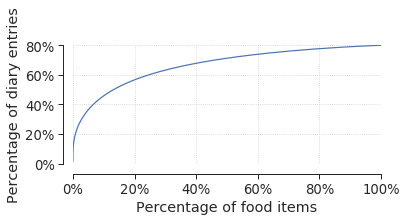

In [7]:
plot_fig2(df_food)